# Part 1: MAP

Write a program in python to implement the MAP (or regularization) for polynomial curve fitting problem. Follow the instructions below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate 50 2D-data points using the following function: 

In [2]:
np.random.seed(5027)
x = np.linspace(0, 1, 50)
y = np.sin(x * x + 1)

Add Gaussian random noise to the data

In [3]:
noise = np.random.normal(0, 0.03, 50)
y_noise = y + noise

Show the original curve line and the noisy data. 

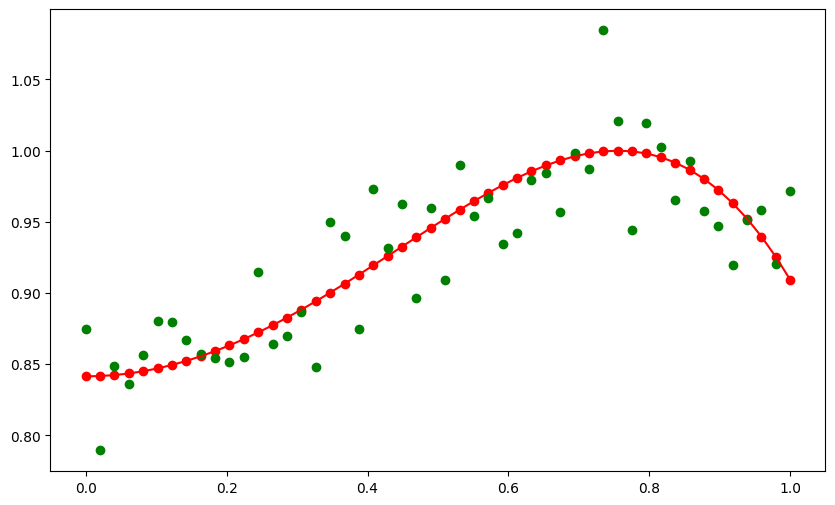

In [4]:
y_line = np.sin(x * x + 1)

plt.figure(figsize = (10,6))
plt.plot(x, y_line, color = "r")
plt.scatter(x, y, color = "r")
plt.scatter(x, y_noise, color = "g")
plt.show()

Fit the generated noisy data using the MAP as discussed in class.

In [5]:
sigma = 0.1
M = 3                          #to change
alpha = 0.4
X_MAP = np.zeros((50, M))

for j in range(50):
    for i in range(M):
        X_MAP[j, i] = x[j]**i

I = np.identity(M)
beta = 1 / (sigma ** 2)

W = beta * np.linalg.inv((beta * X_MAP.T @ X_MAP) + alpha * I) @ X_MAP.T @ y_noise
        
y_pred = X_MAP @ W

Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.

In [6]:
error = np.sum(np.abs(y_pred - y_noise))
print(error)

1.3788950177392272


Display the estimated values of w

In [7]:
print(W)

[ 0.81345916  0.38511402 -0.23290199]


Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of M and alpha. 

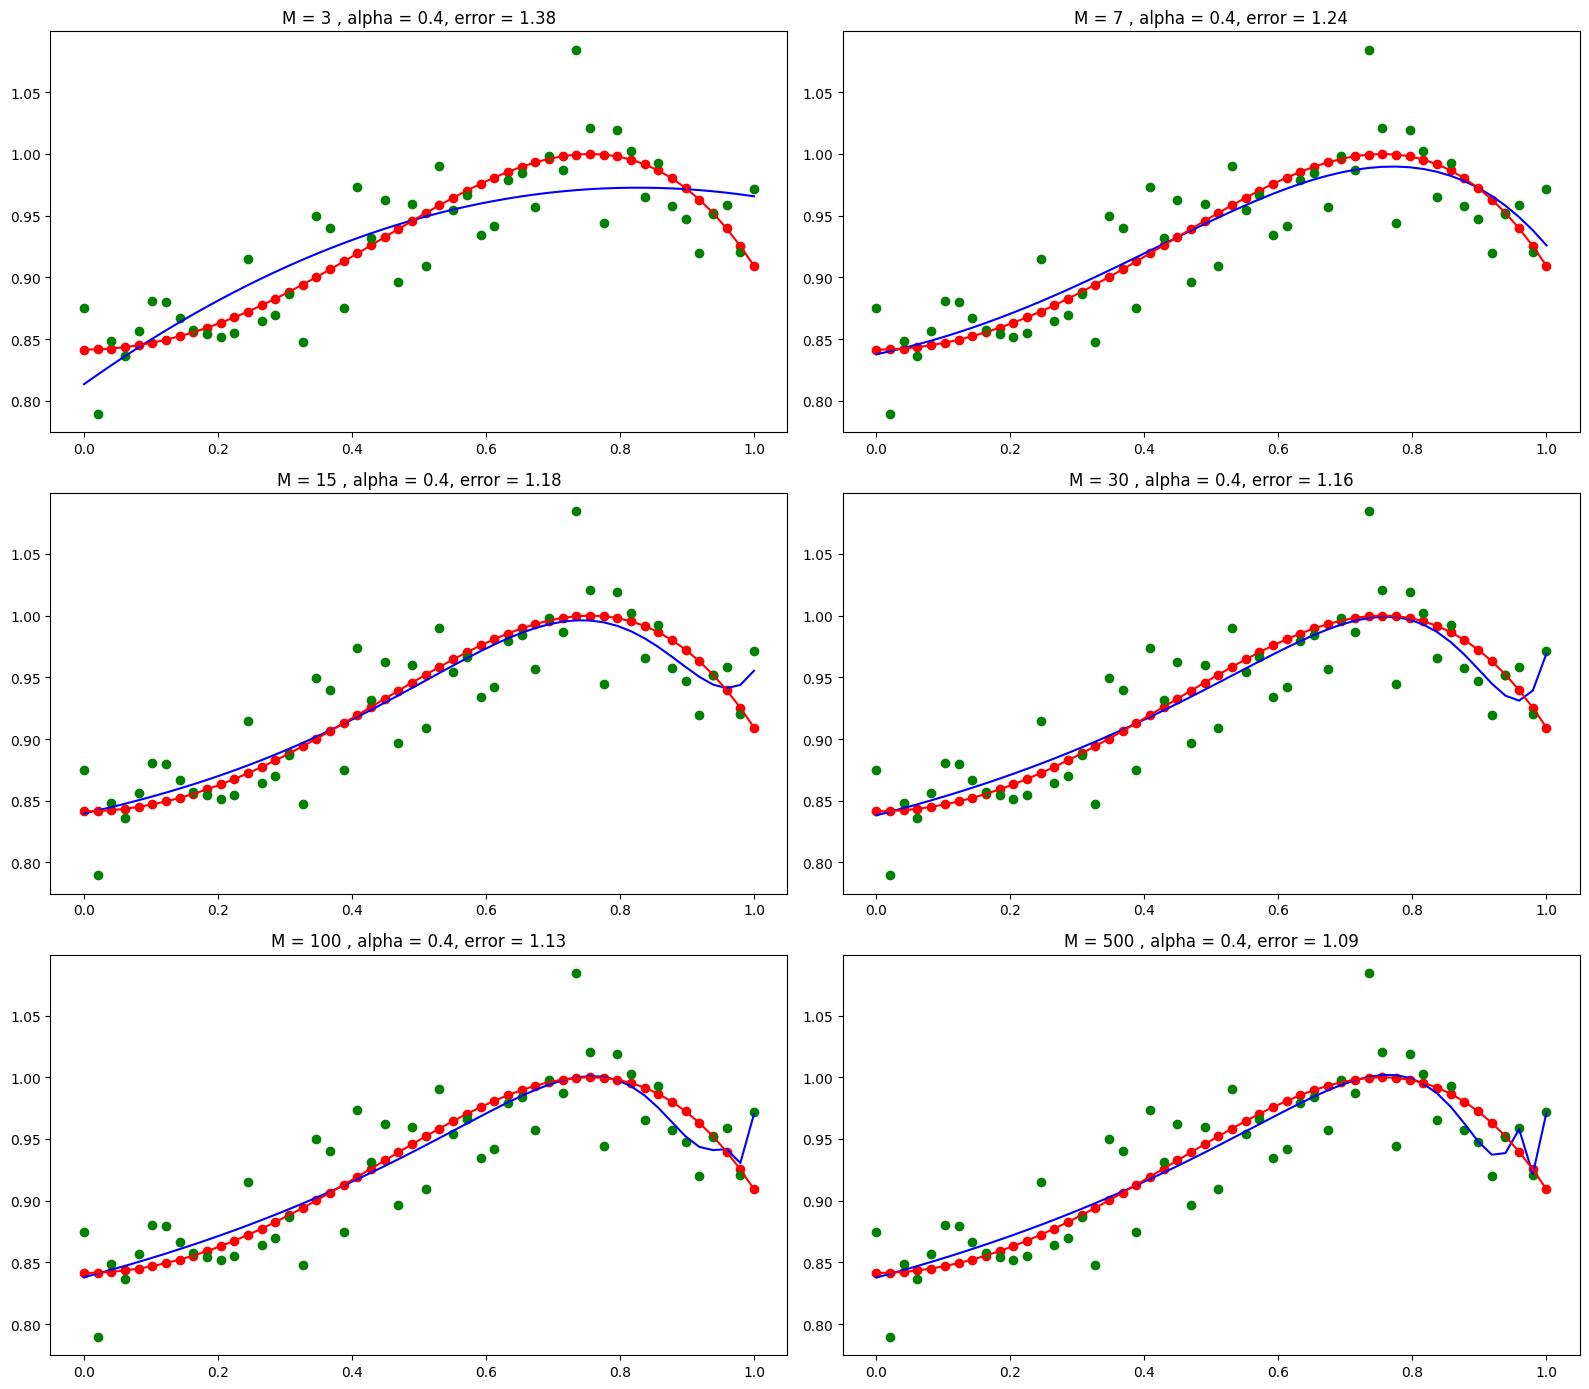

In [8]:
M_trial = [3,7,15,30,100,500]

fig, axs = plt.subplots(3, 2, figsize=(16, 14))

for i, M in enumerate(M_trial):
    row = i // 2
    col = i % 2
    
    sigma = 0.1
    beta = 1 / (sigma ** 2)
    alpha = 0.4
    X_MAP = np.zeros((50, M))
    for j in range(50):
        for i in range(M):
            X_MAP[j, i] = x[j] ** i
    W = beta * np.linalg.inv((beta * np.transpose(X_MAP) @ X_MAP) + alpha * np.identity(M)) @ np.transpose(X_MAP) @ y_noise
    
    y_pred = X_MAP @ W
    error = np.sum(np.abs(y_pred - y_noise))
    
    axs[row, col].plot(x, y_pred, color = "b")
    axs[row, col].plot(x, y_line, color = "r")
    axs[row, col].scatter(x, y, color = "r")
    axs[row, col].scatter(x, y_noise, color = "g")
    axs[row, col].set_title(f"M = {M} , alpha = 0.4, error = {error:.2f}")
         
plt.tight_layout()
plt.show()

First figure in second column (M = 1, alpha = 0.4): An example of how the regularization term reduces the overfitting problem.
Last Figure: An example of the overfitting problem when M = 500, alpha = 0.4. 

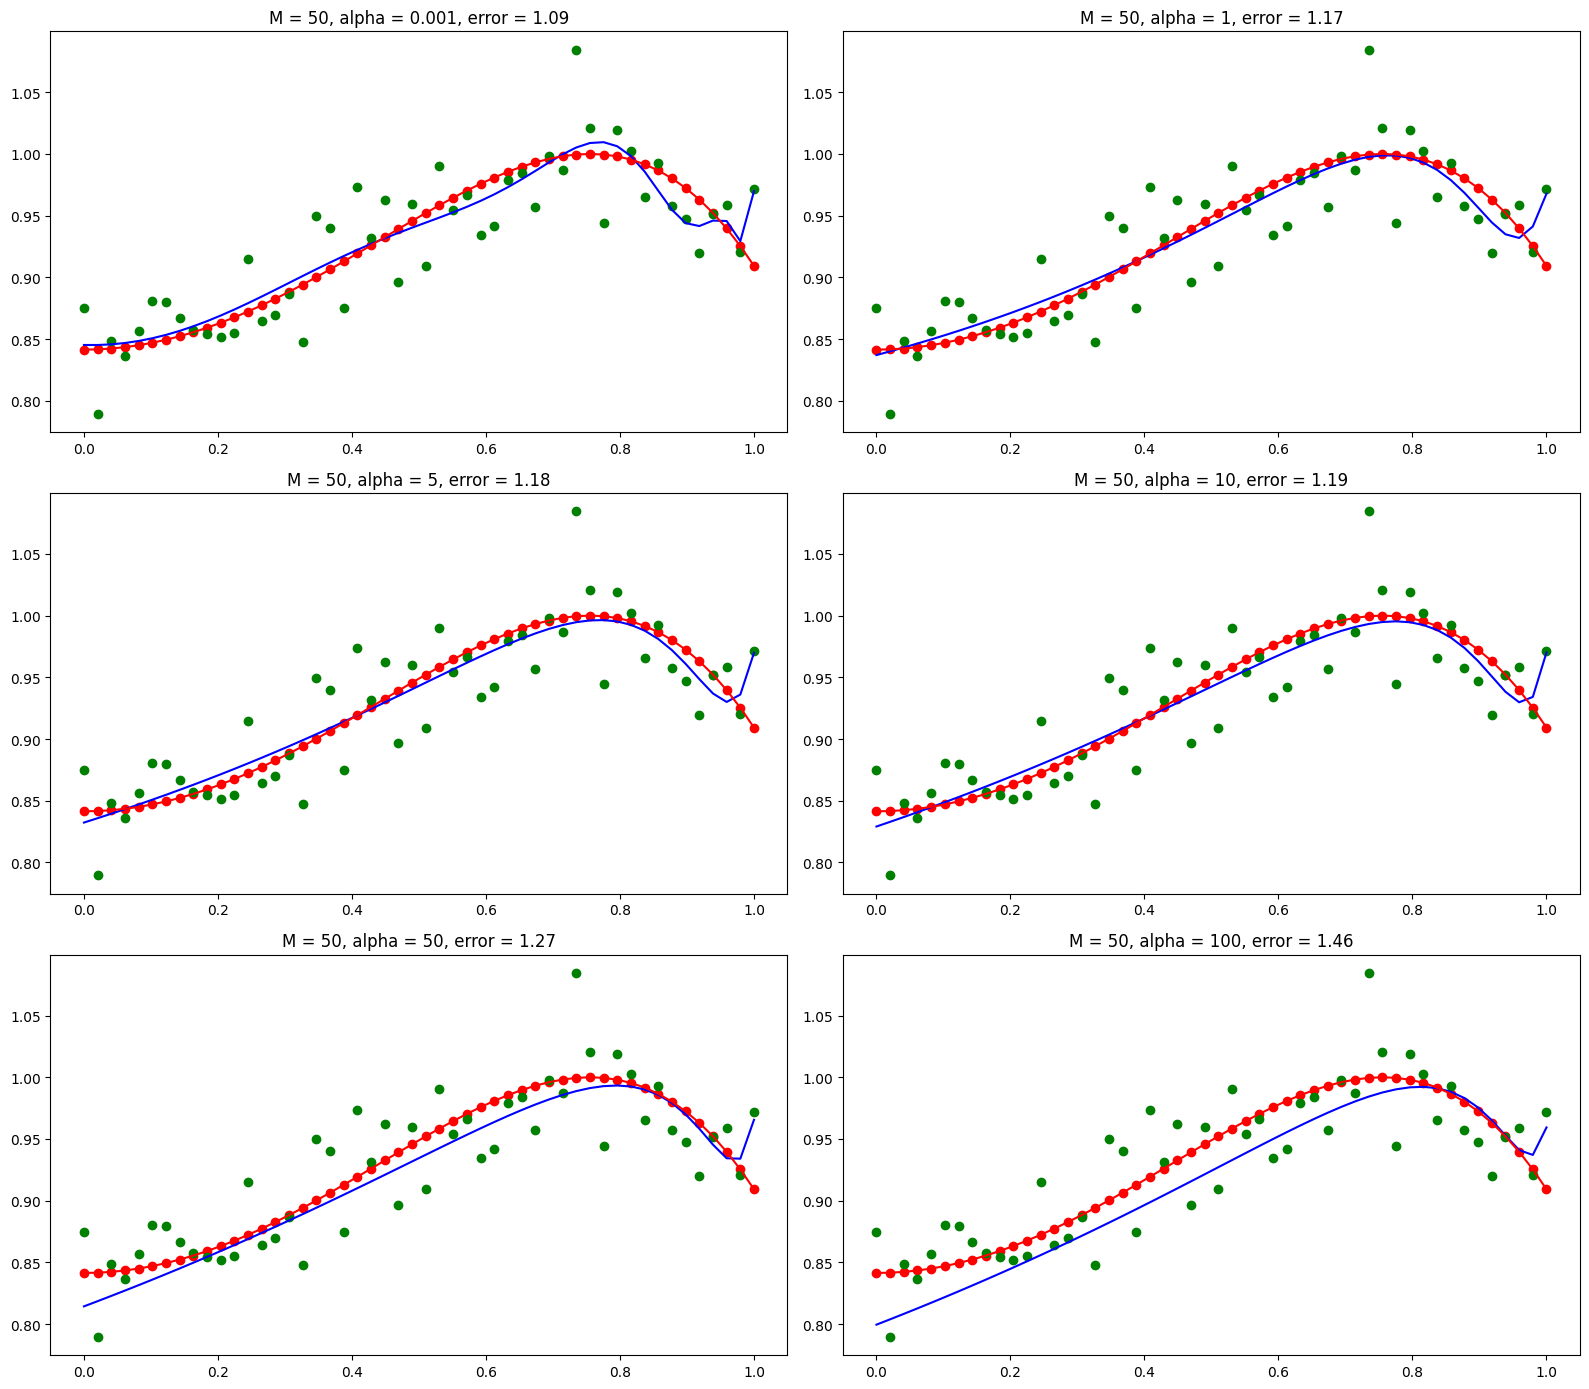

In [9]:
alpha_trial = [0.001,1,5,10,50,100]

fig, axs = plt.subplots(3, 2, figsize=(16, 14))

for i, alpha in enumerate(alpha_trial):
    row = i // 2
    col = i % 2
    sigma = 0.1
    beta = 1/(sigma**2)
    M = 50
    X_MAP = np.zeros((50, M))
    for j in range(50):
        for i in range(M):
            X_MAP[j, i] = x[j]**i
    W = beta * np.linalg.inv((beta * np.transpose(X_MAP) @ X_MAP) + alpha * np.identity(M)) @ np.transpose(X_MAP) @ y_noise
    
    y_pred = X_MAP @ W
    error = np.sum(np.abs(y_pred - y_noise))
            
    axs[row, col].plot(x, y_pred, color = "b")
    axs[row, col].plot(x, y_line, color = "r")
    axs[row, col].scatter(x, y, color = "r")
    axs[row, col].scatter(x, y_noise, color = "g")
    axs[row, col].set_title(f"M = 50, alpha = {alpha}, error = {error:.2f}")
         
plt.tight_layout()
plt.show()

From the experiment in #7, discuss how M and alpha influence on the fitting accuracy.

Answer: Lower M tends to have the problem of underfitting, while higher M tends to have the problem of overfitting; Lower alpha tends to have the problem of overfitting. 